<a href="https://colab.research.google.com/github/Carla9711/Machine-Learning---Classification/blob/main/Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Classification

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import SMOTE

# Display all rows when viewing dataframe
pd.set_option('display.max_rows', None)

from sklearn import set_config
set_config(transform_output='pandas')

# Stroke Prediction Dataset

## Data Dictionary

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

## Load Data

In [3]:
path = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/healthcare-dataset-stroke-data.csv'

In [4]:
df_stroke = pd.read_csv(path)

In [5]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df_stroke.shape

(5110, 12)

## Dataset 2 Q&A

1. [Source of data](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

2. Brief description of data
  * Health and demograohic data collected by WHO

3. What is the target?
  * Whether a patient is likely to have a stroke or not

4. What does one row represent? (A person? A business? An event? A product?)
  * One row represents a person

5. Is this a classification or regression problem?
  * Classification

6. How many features does the data have?
  * 11

7. How many rows are in the dataset?
  * 5110

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
 * None so far

## Clean Data

* Delete unnecessary columns.
* Delete duplicate rows.
* Identify and addressed missing values.
* Identify and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* Produce univariate visuals for the target and all features.
* Identify outliers.


In [7]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# convert column names to lower case to make them easier to remember
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df_stroke['id'].nunique()

5110

* Each row represents a person with a unique id
* id will be dropped because it's not a useful machine learning feature

In [11]:
# drop unnecessary columns
df_stroke.drop(columns=['id'], inplace=True)

In [12]:
# check number of duplicates
df_stroke.duplicated().sum()

0

* There are no duplicate rows to delete

In [13]:
# check categorical columns for inconsistencies
# check value counts of categorical data
cat_col = df_stroke.select_dtypes('object').columns
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')

Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




* There's one row in the dataset with Gender=Other
* This row will be dropped because there's not adequate data to train and test the model on this sub-category

In [14]:
# drop row where gender = Other
df_stroke.drop(df_stroke[df_stroke['gender']=='Other'].index,inplace=True)

In [15]:
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [16]:
# check impossible numerical values
df_stroke.describe().loc[['min','mean','max']]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


* Age of 0.08 seems unlikely

In [17]:
# check age value counts
df_stroke['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
55.00     83
50.00     83
59.00     80
31.00     79
49.00     79
56.00     77
37.00     76
61.00     76
47.00     75
44.00     75
62.00     74
40.00     74
63.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
80.00     70
43.00     70
34.00     68
58.00     68
48.00     66
5.00      65
23.00     64
65.00     62
46.00     62
71.00     61
26.00     61
18.00     60
66.00     60
17.00     60
81.00     60
20.00     59
8.00      58
13.00     57
25.00     57
33.00     57
82.00     56
2.00      55
30.00     55
24.00     55
27.00     55
14.00     54
35.00     54
28.00     54
69.00     54
75.00     53
64.00     53
36.00     52
16.00     52
29.00     51
76.00     50
19.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
22.00     45
72.00     45
15.00     45
70.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

* Most age values are integers
* There are some age values between 0 and 2 with float data types (i.e. decimal places). These are hard to intepret
* For this reason, age values below 1.5 will be replaced by 1 and age values between 1.5 and 2 will be replaced by 2

In [18]:
# replace age below 1.5 with 1 and age between 1.5 and 2 with 2
df_stroke.loc[df_stroke['age']<1.5,'age'] = 1
df_stroke.loc[(df_stroke['age']>=1.5) & (df_stroke['age']<2),'age'] = 2

In [19]:
# check age value counts again
df_stroke['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
51.0     86
53.0     85
1.0      85
45.0     85
79.0     85
55.0     83
50.0     83
59.0     80
49.0     79
31.0     79
56.0     77
61.0     76
37.0     76
44.0     75
47.0     75
40.0     74
63.0     74
62.0     74
41.0     73
38.0     72
60.0     72
42.0     71
32.0     71
39.0     71
80.0     70
43.0     70
58.0     68
34.0     68
48.0     66
5.0      65
23.0     64
65.0     62
46.0     62
26.0     61
71.0     61
17.0     60
66.0     60
18.0     60
81.0     60
20.0     59
8.0      58
13.0     57
25.0     57
33.0     57
82.0     56
27.0     55
30.0     55
24.0     55
35.0     54
14.0     54
69.0     54
28.0     54
75.0     53
64.0     53
16.0     52
36.0     52
29.0     51
19.0     50
76.0     50
67.0     49
21.0     47
68.0     47
73.0     46
3.0      46
72.0     45
15.0     45
12.0     45
70.0     45
22.0     45
77.0     42
74.0     40
9.0      38
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: age, dtype

In [20]:
# identify missing values
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* There are 201 missing bmi values

In [21]:
# create EDA copy
# replace missing bmi values with -1
df_eda = df_stroke.copy()
df_eda['bmi'].fillna(-1, inplace=True)

In [22]:
# confirm missing values have been replaced
df_eda['bmi'].isna().sum()

0

## Univariate Visualizations

In [23]:
# create dataframe of numeric columns
col_num = df_eda.select_dtypes('number').drop(columns=['hypertension','heart_disease','stroke'])
col_num.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,-1.0
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


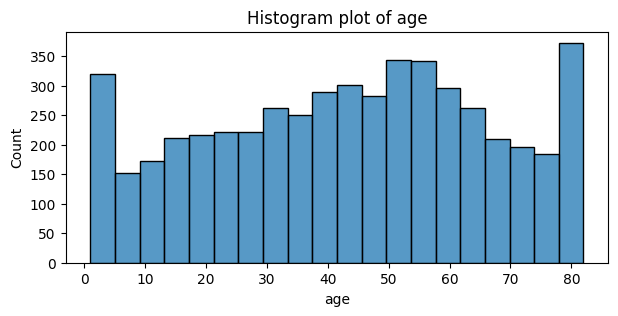

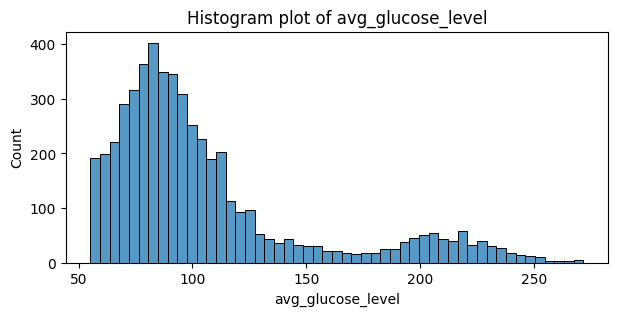

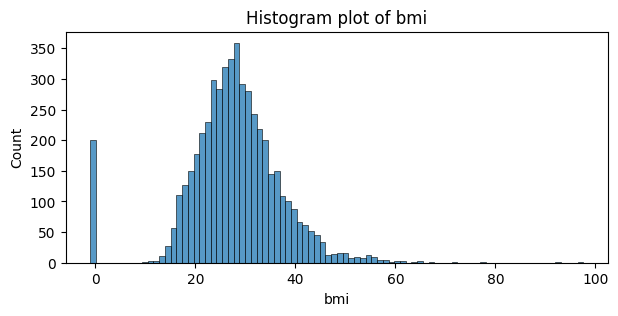

In [24]:
# Histogram plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.histplot(x=col, data=col_num,bins='auto')
    ax.set_title(f"Histogram plot of {col}")

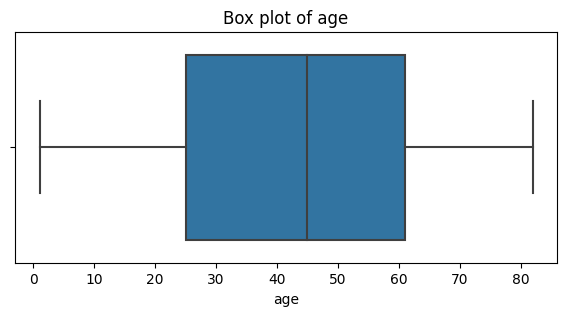

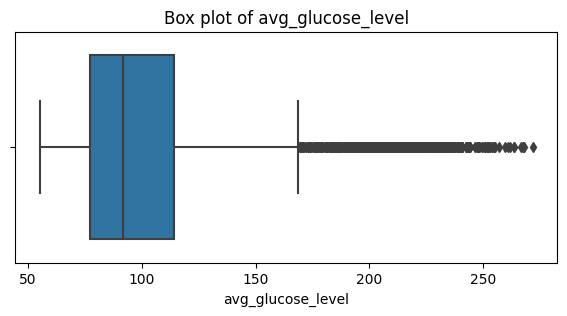

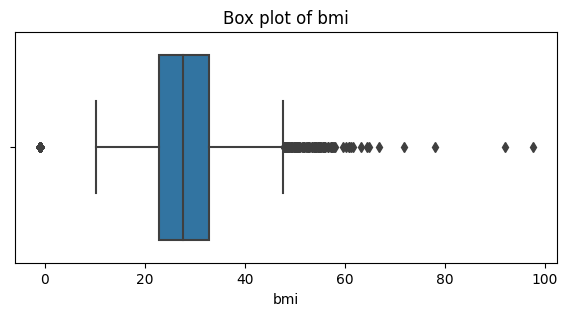

In [25]:
# Box plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.boxplot(x=col, data=col_num)
    ax.set_title(f"Box plot of {col}")

**Numeric univariate vizualization intepretations**

Age
  * Normal distribution between 2 and 78
  * Higher value counts between 1-2 and 78-82

avg_glucose_level
  * Skewed to the right
  * Most of the data lies between 55 and 125

bmi
  * Skewed to the right
  * Some outliers with bmi's > 45  

In [26]:
# create dataframe of ordinal and nominal columns
col_cat = df_eda[['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status','stroke']]
col_cat.head()

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1


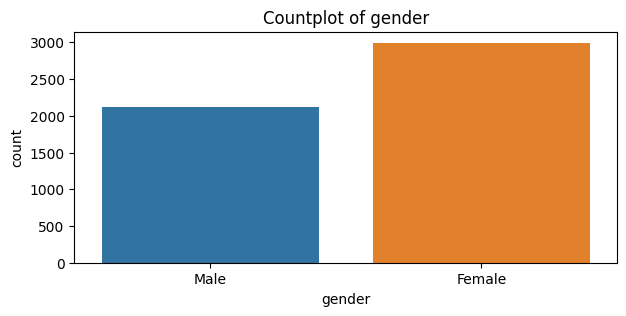

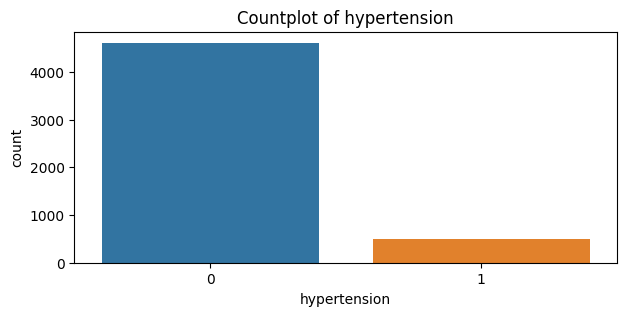

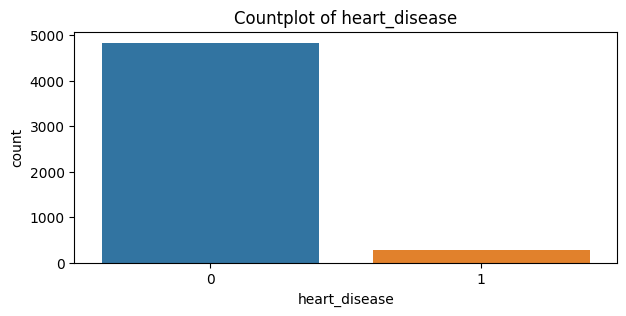

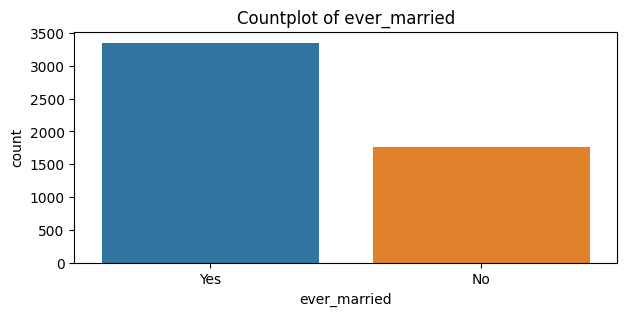

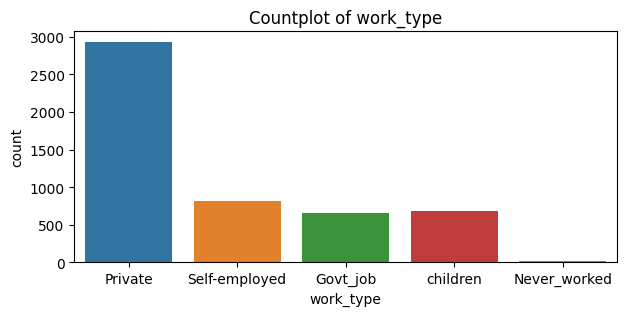

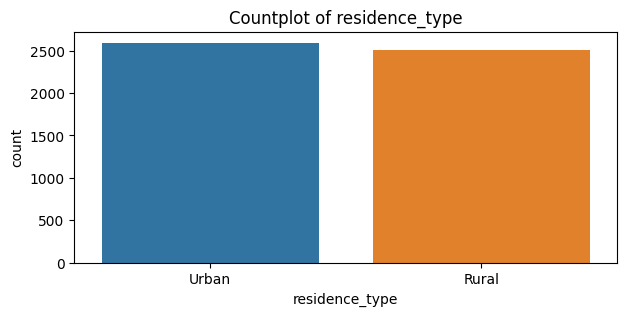

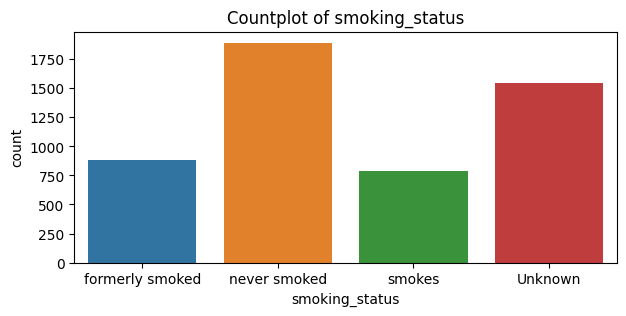

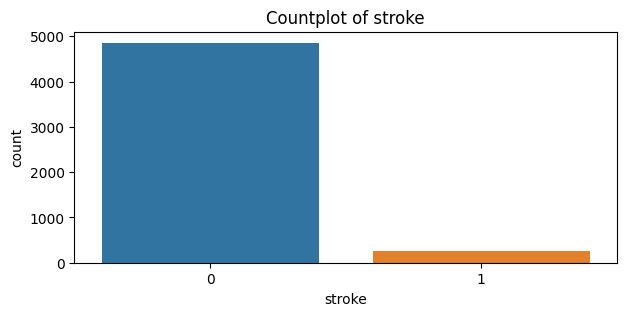

In [27]:
# Countplot of all categorical columns
for i, col in enumerate(col_cat.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.countplot(x=col, data=col_cat)
    ax.set_title(f"Countplot of {col}")

**Categorical univariate vizualization intepretations**

gender
  * More females than males

hypertention
  * More patients without hypertention than with hypertention

heart disease
  * More patients without heart disease than with heart disease

ever_married
  * More patients married than never married

work_type
  * Most patients have a Private work type

Residential_type
  * Somewhat even split between Urban and Rural

smoking_status
  * Most patients never smoked than smoked
  * There's also a large portion of patients with an unknown smoking status

stroke (target)
  * Most patients did not have a stroke compared to those that did have a stroke



## Mulivariate Visualizations

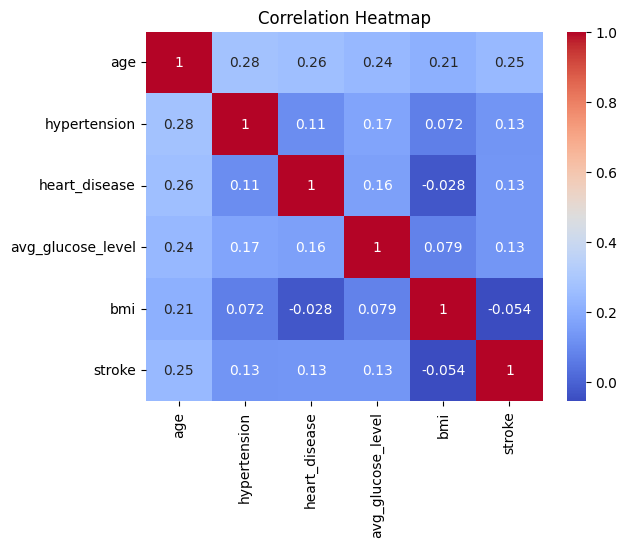

In [28]:
# correlation heatmap
# Fine correlations
corr = df_eda.corr(numeric_only=True)

ax = sns.heatmap(corr,annot=True, cmap='coolwarm')
ax.set(title='Correlation Heatmap');

* There are no strong correlations between the target and the features
* There are also no strong correlations between one feature and another feature

### Define EDA Functions

[Function reference from lectures](https://login.codingdojo.com/m/717/16237/120172)

In [29]:
# define function for multivariate numeric vs categorical plot
def plot_target_vs_numerical(df,y, x='stroke', figsize=(6,4), order = None):

  fig, ax = plt.subplots(figsize=figsize)

  # barplot without error bar and 60% transparency
  sns.barplot(data=df, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black',errorbar=None)
  # striplot with order and hue order same as barplot
  sns.stripplot(data=df, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order, legend=False, edgecolor='white', linewidth=0.5, size=3, zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')

  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

[Function reference from StackOverflow](https://stackoverflow.com/questions/35692781/plotting-percentage-in-seaborn-bar-plot#:~:text=without_hue%20function%20will%20plot%20percentages,and%20feature%20as%20a%20parameter.&text=To%20get%20the%20relative%20frequencies,over%20the%20overall%20total%20count.)

In [30]:
def plot_target_vs_categorical(df, x ,y='proportion' ,hue='stroke', figsize=(6,4)):

  fig, ax = plt.subplots(figsize=figsize)

  (df[hue]
  .groupby(df_eda[x])
  .value_counts(normalize=True)
  .rename(y)
  .reset_index()
  .pipe((sns.barplot, "data"), x=x, y=y, alpha=0.8, linewidth=1, edgecolor='black', hue=hue, ax=ax))

  ax.set_title(f"{x} vs. {hue}", fontweight='bold')

  fig.tight_layout()
  plt.show()

  data = (df_eda[hue]
        .groupby(df_eda[x])
        .value_counts(normalize=True)
        .rename(y)
        .reset_index())
  return data

### Target vs Numerical

In [31]:
# display list of numerical columns
col_num.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

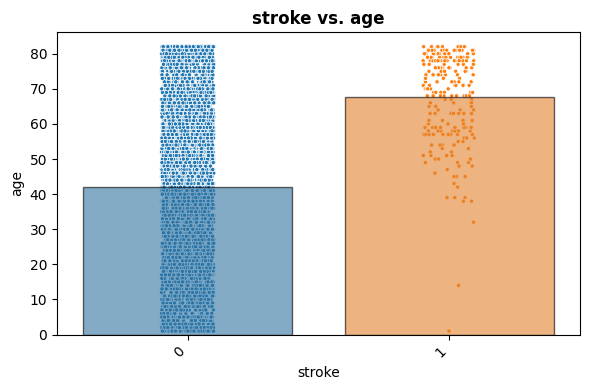

In [32]:
plot_target_vs_numerical(df_eda, y='age');

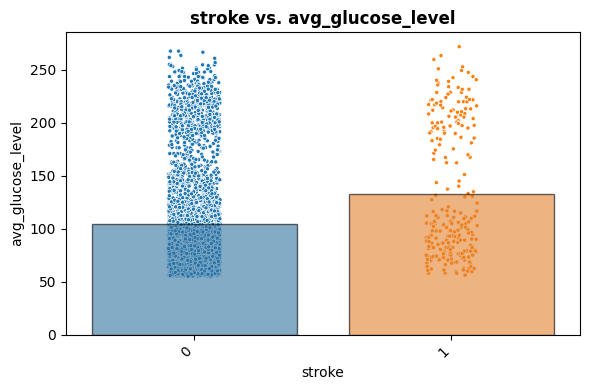

In [33]:
plot_target_vs_numerical(df_eda, y='avg_glucose_level');

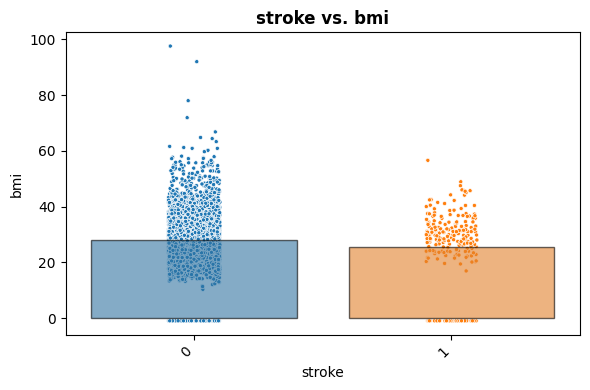

In [34]:
plot_target_vs_numerical(df_eda, y='bmi');

### Target vs Categorical

In [35]:
# display list of categorical columns
col_cat.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'residence_type', 'smoking_status', 'stroke'],
      dtype='object')

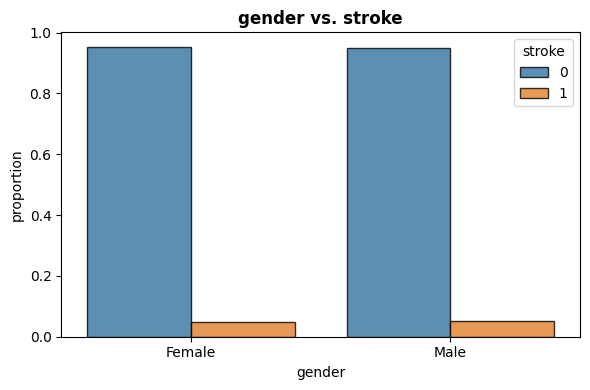

,gender,stroke,proportion
0,Female,0,0.952906
1,Female,1,0.047094
2,Male,0,0.948936
3,Male,1,0.051064


In [36]:
plot_target_vs_categorical(df=df_eda, x='gender')

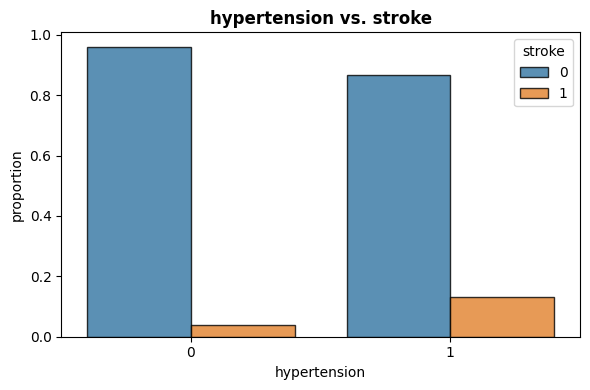

,hypertension,stroke,proportion
0,0,0,0.960312
1,0,1,0.039688
2,1,0,0.867470
3,1,1,0.132530


In [37]:
plot_target_vs_categorical(df=df_eda, x='hypertension')

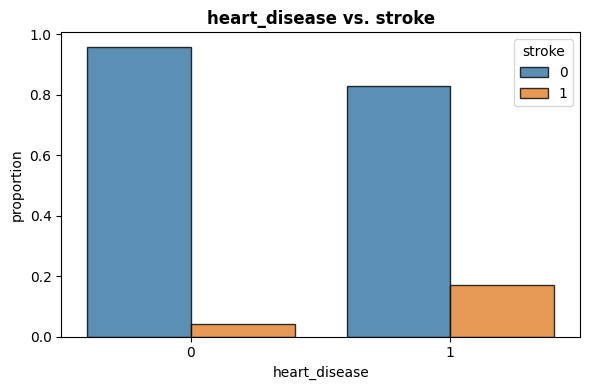

,heart_disease,stroke,proportion
0,0,0,0.958204
1,0,1,0.041796
2,1,0,0.829710
3,1,1,0.170290


In [38]:
plot_target_vs_categorical(df=df_eda, x='heart_disease')

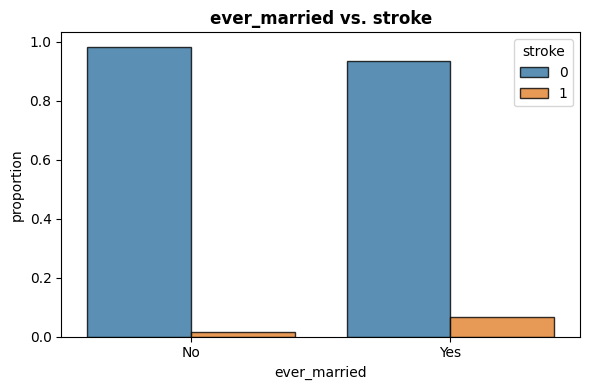

,ever_married,stroke,proportion
0,No,0,0.983485
1,No,1,0.016515
2,Yes,0,0.934387
3,Yes,1,0.065613


In [39]:
plot_target_vs_categorical(df=df_eda, x='ever_married')

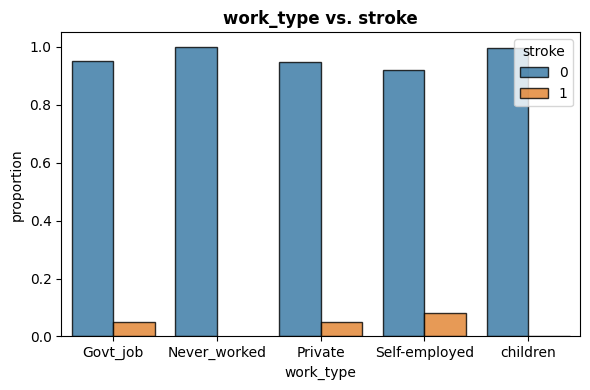

,work_type,stroke,proportion
0,Govt_job,0,0.949772
1,Govt_job,1,0.050228
2,Never_worked,0,1.000000
3,Private,0,0.949042
4,Private,1,0.050958
5,Self-employed,0,0.920635
6,Self-employed,1,0.079365
7,children,0,0.997089
8,children,1,0.002911


In [40]:
plot_target_vs_categorical(df=df_eda, x='work_type')

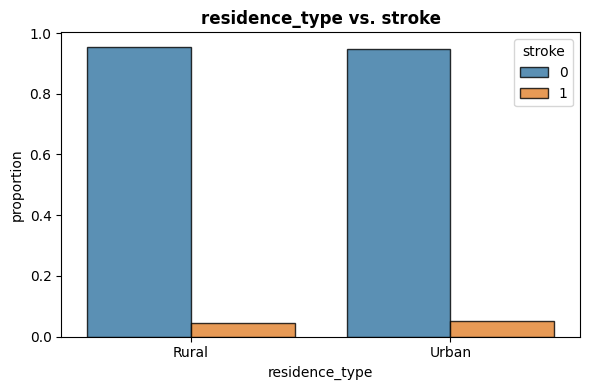

,residence_type,stroke,proportion
0,Rural,0,0.954636
1,Rural,1,0.045364
2,Urban,0,0.947997
3,Urban,1,0.052003


In [41]:
plot_target_vs_categorical(df=df_eda, x='residence_type')

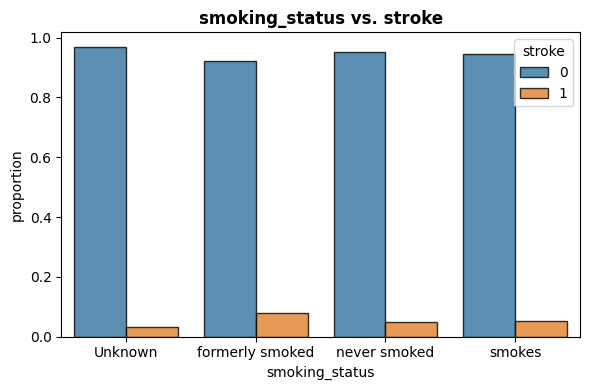

,smoking_status,stroke,proportion
0,Unknown,0,0.969560
1,Unknown,1,0.030440
2,formerly smoked,0,0.920814
3,formerly smoked,1,0.079186
4,never smoked,0,0.952431
5,never smoked,1,0.047569
6,smokes,0,0.946768
7,smokes,1,0.053232


In [42]:
plot_target_vs_categorical(df=df_eda, x='smoking_status')

### Key Trends

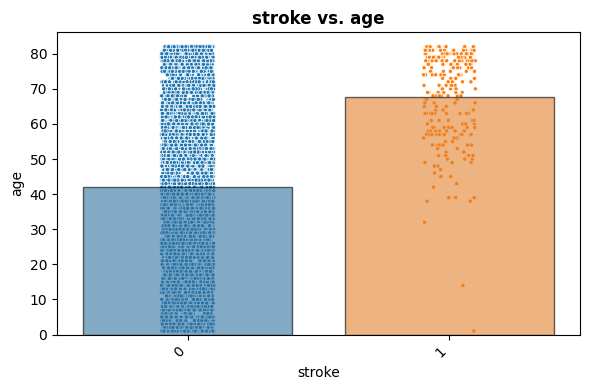

In [43]:
plot_target_vs_numerical(df_eda, y='age');

* The bar plot above shows that the average age of people who have had strokes are higher than the average age of people who have not had strokes
* The strip plot overlaying the bar plot shows that there's 3 outliers where patients below the age of 35 have had strokes

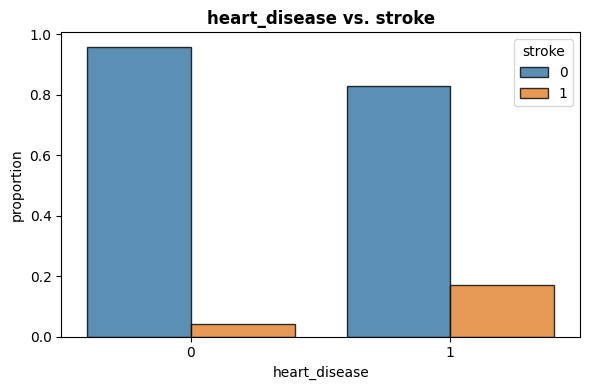

,heart_disease,stroke,proportion
0,0,0,0.958204
1,0,1,0.041796
2,1,0,0.829710
3,1,1,0.170290


In [44]:
plot_target_vs_categorical(df=df_eda, x='heart_disease')

* The count plot above shows that 4.2% of people that do not have a heart disease are likely to have a stoke
* This percentace increases to 17% for people who do have a heart disease

## Machine Learning Preprocessing

### Create df copy for Machine Learning

In [45]:
# create ML learning copy of data tto prevent data leakage
df_ml = df_stroke.copy()

In [46]:
# check that null values exist
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


### Encoding

* Encode gender as a binary feature
* One hot encode ever-married, work_type, residence_type and smoking_status

In [47]:
df_ml['gender'] = df_ml['gender'].apply(lambda x: 1 if x == 'Female' else 0)
df_ml = df_ml.rename({'gender': 'isfemale'}, axis=1)
df_ml.head()

,isfemale,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Split Data

In [48]:
# define X and y features
target = 'stroke'
X = df_ml.drop(columns=target)
y = df_ml[target]

In [49]:
X.head()

,isfemale,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [50]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [51]:
y.value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

* target data is unbalanced

In [52]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Column Selectors

In [53]:
# create list of numerical columns
col_num = X_train.select_dtypes('number').columns
col_num

Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')

In [54]:
# create list of nominal columns
col_nom = X_train.select_dtypes('object').columns
col_nom

Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object')

### Imputers

In [55]:
# impute numerical missing values with the median
impute_median = SimpleImputer(strategy='median')

* As shown in the boxplots and histograms of the numerical data, most numerical features are skewed and therefore the median has been chosen to impute missing values

### Transformers

In [56]:
# numerical scaler
scaler = StandardScaler()

In [57]:
# encode nominal columns
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

### Preprocessing Pipelines

In [58]:
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### Tuples

In [59]:
# numeric tuple
num_tuple = ('numeric', num_pipe, col_num)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
        'bmi'],
       dtype='object'))

In [60]:
# nominal tuple
ohe_tuple = ('nominal', ohe_encoder, col_nom)
ohe_tuple

('nominal',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))

### ColumnTransformer

In [61]:
preprocessing = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False, remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                ('nominal',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                  verbose_feature_names_out=False)

In [62]:
# test preprocessing pipeline
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [63]:
X_train_tf.head()

,isfemale,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3587,0.838252,1.268037,3.124298,4.090979,2.086958,0.323222,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1470,-1.192958,-1.116942,-0.320072,-0.244440,-0.509269,1.506137,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4432,0.838252,-1.337774,-0.320072,-0.244440,0.911112,-0.781698,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2397,-1.192958,-1.823603,-0.320072,-0.244440,0.213531,-1.002682,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
717,0.838252,-1.337774,-0.320072,-0.244440,-0.954208,-1.210667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [64]:
X_train_tf.describe()

,isfemale,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,3.831000e+03,3.831000e+03,3.831000e+03,3.831000e+03,3.831000e+03,3.831000e+03,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000
mean,1.085010e-16,1.493049e-16,1.854719e-17,2.040191e-17,3.338494e-16,1.613605e-16,0.340381,0.659619,0.129992,0.004176,0.567737,0.161838,0.136257,0.496476,0.503524,0.302793,0.175150,0.372227,0.149830
std,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,0.473899,0.473899,0.336339,0.064499,0.495455,0.368350,0.343106,0.500053,0.500053,0.459526,0.380145,0.483461,0.356952
min,-1.192958e+00,-1.867769e+00,-3.200719e-01,-2.444403e-01,-1.135246e+00,-2.406580e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.192958e+00,-8.077784e-01,-3.200719e-01,-2.444403e-01,-6.332263e-01,-6.647063e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.382521e-01,7.554729e-02,-3.200719e-01,-2.444403e-01,-3.104430e-01,-1.057467e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.382521e-01,7.822078e-01,-3.200719e-01,-2.444403e-01,1.799805e-01,5.052091e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,8.382521e-01,1.709700e+00,3.124298e+00,4.090979e+00,3.740166e+00,8.213651e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X_test_tf.describe()

,isfemale,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
mean,-0.010470,-0.009813,0.062636,-0.040899,0.045318,0.023837,0.353678,0.646322,0.124413,0.004695,0.586072,0.155712,0.129108,0.478091,0.521909,0.300469,0.166667,0.364632,0.168232
std,1.002193,0.993687,1.082885,0.917423,1.075882,1.003596,0.478298,0.478298,0.330181,0.068385,0.492729,0.362724,0.335451,0.499715,0.499715,0.458642,0.372824,0.481515,0.374218
min,-1.192958,-1.867769,-0.320072,-0.244440,-1.137498,-2.276590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.192958,-0.807778,-0.320072,-0.244440,-0.657263,-0.638708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.838252,0.053464,-0.320072,-0.244440,-0.307854,-0.105747,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.838252,0.738042,-0.320072,-0.244440,0.237568,0.544206,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,0.838252,1.709700,3.124298,4.090979,3.647171,8.941598,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

### Logistic Regression

#### Baseline Model

In [66]:
# instantiate default logistic regression model
logreg = LogisticRegression(random_state = 42)

# Create pipeline
logreg_pipe = make_pipeline(preprocessing, logreg)

# fit model pipeline
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [67]:
# predit and save train and test data
train_preds = logreg_pipe.predict(X_train)
test_preds = logreg_pipe.predict(X_test)

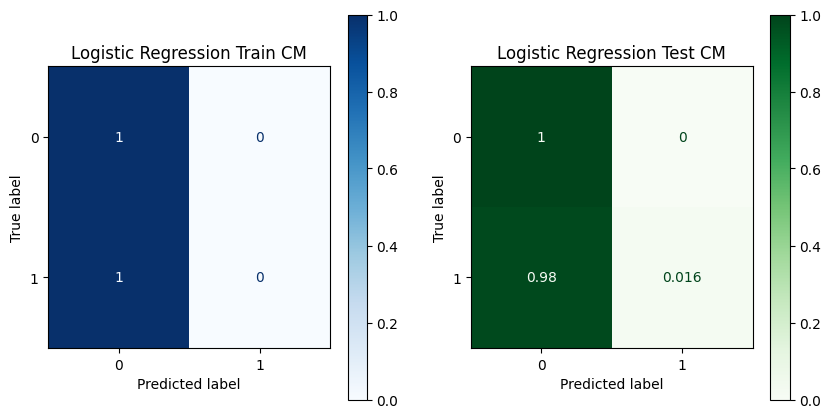

In [68]:
# Model evaluation from code along ML lecture 7
# display confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[0].set_title('Baseline: LogReg Train CM')
axes[1].set_title('Baseline: LogReg Test CM');

In [81]:
# print classification report
print('Baseline: LogReg Train\n', classification_report(y_train, train_preds))
print('Baseline: LogReg Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3644
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.90      0.95      0.93      3831

Test
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       1.00      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.98      0.51      0.50      1278
weighted avg       0.95      0.95      0.93      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Balanced Model

In [69]:
# instantiate smote
smote = SMOTE(random_state=42)

# instantiate default logistic regression model
logreg_smote = LogisticRegression(random_state = 42)

# Create pipeline
logreg_pipe_smote = make_sampler_pipeline(preprocessing, smote, logreg_smote)

# fit model pipeline
logreg_pipe_smote.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [70]:
# predit and save train and test data
train_preds_smote = logreg_pipe.predict(X_train)
test_preds_smote = logreg_pipe.predict(X_test)

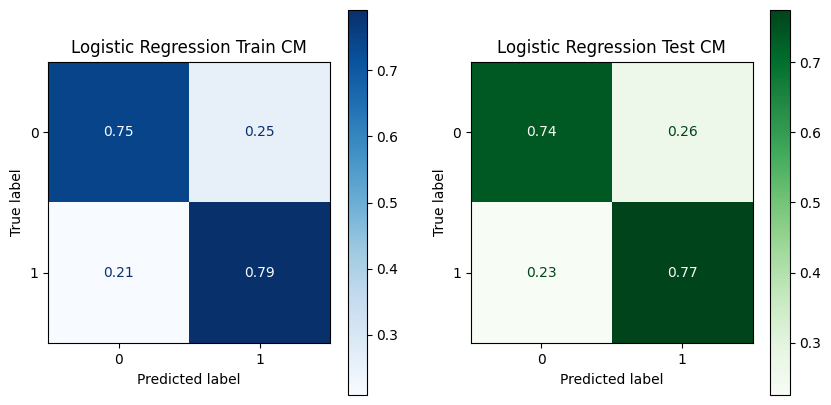

In [71]:
# Model evaluation from code along ML lecture 7
# display confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds_smote,
                                        ax=axes[0], cmap='Blues',normalize='true')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_smote,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[0].set_title('Balanced: LogReg Train CM')
axes[1].set_title('Balanced: LogReg Test CM');

In [82]:
# print classification report
print('Balanced: LogReg Train\n', classification_report(y_train, train_preds_smote))
print('Balanced: LogReg Test\n', classification_report(y_test, test_preds_smote))

Train
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      3644
           1       0.14      0.79      0.23       187

    accuracy                           0.75      3831
   macro avg       0.56      0.77      0.54      3831
weighted avg       0.94      0.75      0.82      3831

Test
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1216
           1       0.13      0.77      0.22        62

    accuracy                           0.74      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.74      0.81      1278



#### Tuned model

In [72]:
# find paramaters of default model
logreg_pipe_smote.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
          'bmi'],
         dtype='object')),
                                   ('nominal',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('smote', SMO

In [73]:
# choose parameters to tune
param_grid_log_reg = {'logisticregression__C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
                      'logisticregression__max_iter':[1000]
                      }

In [74]:
gridsearch_log_reg = GridSearchCV(logreg_pipe_smote, param_grid_log_reg)

In [75]:
gridsearch_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                                        ('nominal',
                                                                         OneHotEn...='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000, 10000],
                         'logisticregression__max_iter': [1000]})

In [76]:
gridsearch_log_reg.best_params_

{'logisticregression__C': 0.0001, 'logisticregression__max_iter': 1000}

In [77]:
best_log_reg_grid = gridsearch_log_reg.best_estimator_

In [78]:
# predit and save train and test data
train_preds_best = best_log_reg_grid.predict(X_train)
test_preds_best = best_log_reg_grid.predict(X_test)

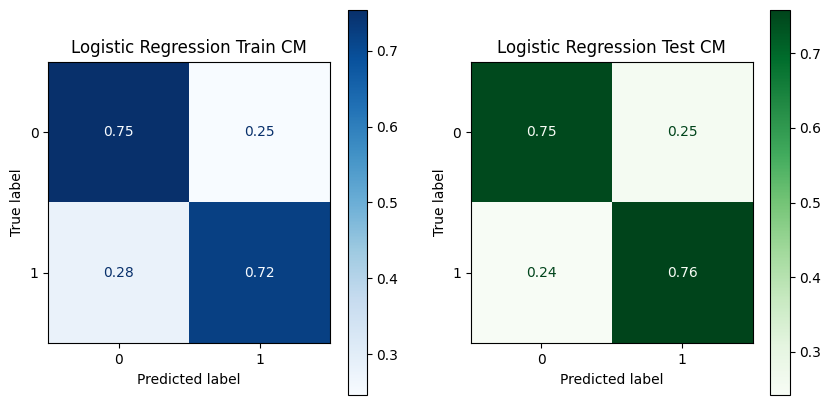

In [79]:
# Model evaluation from code along ML lecture 7
# display confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds_best,
                                        ax=axes[0], cmap='Blues',normalize='true')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_best,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[0].set_title('Tuned: LogReg Train CM')
axes[1].set_title('Tuned: LogReg Test CM');

In [83]:
# print classification report
print('Tuned: LogReg Train\n', classification_report(y_train, train_preds_best))
print('Tuned: LogReg Test\n', classification_report(y_test, test_preds_best))

Train
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      3644
           1       0.13      0.72      0.22       187

    accuracy                           0.75      3831
   macro avg       0.56      0.74      0.54      3831
weighted avg       0.94      0.75      0.82      3831

Test
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1216
           1       0.13      0.76      0.23        62

    accuracy                           0.75      1278
   macro avg       0.56      0.75      0.54      1278
weighted avg       0.94      0.75      0.82      1278



### K Nearest Neighbors

#### Baseline Model

In [85]:
# instatiate default KNN model
knn = KNeighborsClassifier(random_state=42)

# Create pipeline
knn_pipe = make_pipeline(preprocessing, knn)

# fit model pipeline
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [86]:
# predit and save train and test data
train_preds_knn = knn_pipe.predict(X_train)
test_preds_knn = knn_pipe.predict(X_test)

Text(0.5, 1.0, 'KNN Test CM')

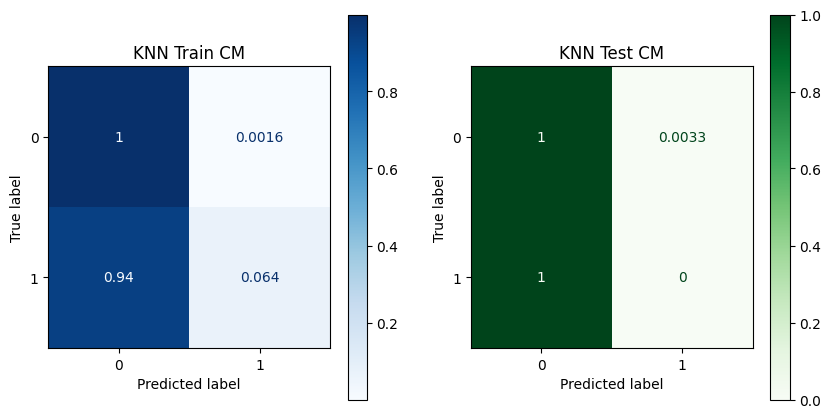

In [88]:
# Model evaluation
# display confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds_knn,
                                        ax=axes[0], cmap='Blues',normalize='true')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_knn,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[0].set_title('Baseline: KNN Train CM')
axes[1].set_title('Baselind: KNN Test CM');

In [87]:
# print classification report
print('Baseline: KNN Train\n', classification_report(y_train, train_preds_knn))
print('Baseline: KNN Test\n', classification_report(y_test, test_preds_knn))

Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3644
           1       0.67      0.06      0.12       187

    accuracy                           0.95      3831
   macro avg       0.81      0.53      0.55      3831
weighted avg       0.94      0.95      0.93      3831

Test
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



#### Balanced model

In [89]:
# instantiate smote
smote = SMOTE(random_state=42)

# instantiate default logistic regression model
knn_smote = KNeighborsClassifier(random_state=42)

# Create pipeline
knn_pipe_smote = make_sampler_pipeline(preprocessing, smote, knn_smote)

# fit model pipeline
knn_pipe_smote.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [91]:
# predit and save train and test data
train_preds_smote_knn = logreg_pipe.predict(X_train)
test_preds_smote_knn = logreg_pipe.predict(X_test)

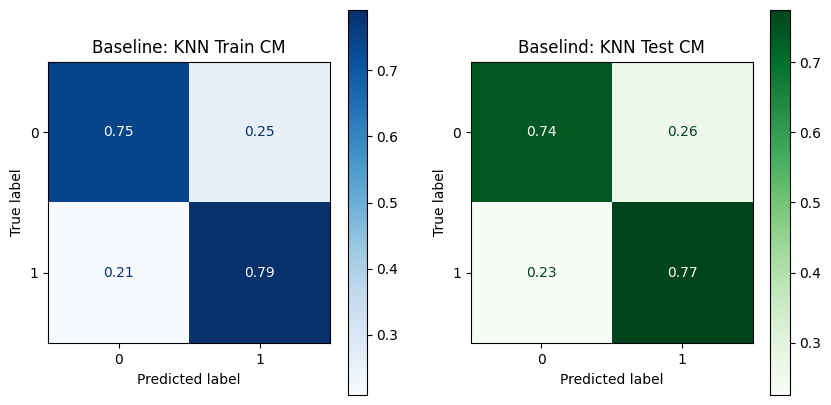

In [92]:
# Model evaluation
# display confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds_smote_knn,
                                        ax=axes[0], cmap='Blues',normalize='true')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_smote_knn,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[0].set_title('Balanced: KNN Train CM')
axes[1].set_title('Balanced: KNN Test CM');

In [93]:
# print classification report
print('Balanced: KNN Train\n', classification_report(y_train, train_preds_smote_knn))
print('Balanced: KNN Test\n', classification_report(y_test, test_preds_smote_knn))

Train
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      3644
           1       0.14      0.79      0.23       187

    accuracy                           0.75      3831
   macro avg       0.56      0.77      0.54      3831
weighted avg       0.94      0.75      0.82      3831

Test
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1216
           1       0.13      0.77      0.22        62

    accuracy                           0.74      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.74      0.81      1278



#### Tuned model

In [94]:
knn_pipe_smote.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
          'bmi'],
         dtype='object')),
                                   ('nominal',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['ever_married', 'work_type', 'residence_type', 'smoking_status'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('smote', SMO

In [95]:
param_grid_knn = {'kneighborsclassifier__n_neighbors':[1,5,10,20],
                 'kneighborsclassifier__leaf_size':[10, 20, 30, 40],
                 'kneighborsclassifier__p': [1,2],
                 'kneighborsclassifier__weights':['uniform','distance',None],
                  'kneighborsclassifier__algorithm':['ball_tree','kd_tree','brute']
                }

In [96]:
gridsearch_knn = GridSearchCV(knn_pipe, param_grid_knn)

In [97]:
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['isfemale', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                                        ('nominal',
                                                                         OneHotEn...
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__leaf_size': [10, 20, 30, 40],
                         'kneighborsclassifier__n_neighbors': [1, 5, 10, 20],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance', None]})

In [98]:
gridsearch_knn.best_params_

{'kneighborsclassifier__algorithm': 'ball_tree',
 'kneighborsclassifier__leaf_size': 10,
 'kneighborsclassifier__n_neighbors': 20,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [99]:
best_knn_grid = gridsearch_knn.best_estimator_

In [100]:
# predict train and test data
train_preds_best_knn = best_knn_grid .predict(X_train)
test_preds_best_knn = best_knn_grid .predict(X_test)

Text(0.5, 1.0, 'KNN - Tuned Test CM')

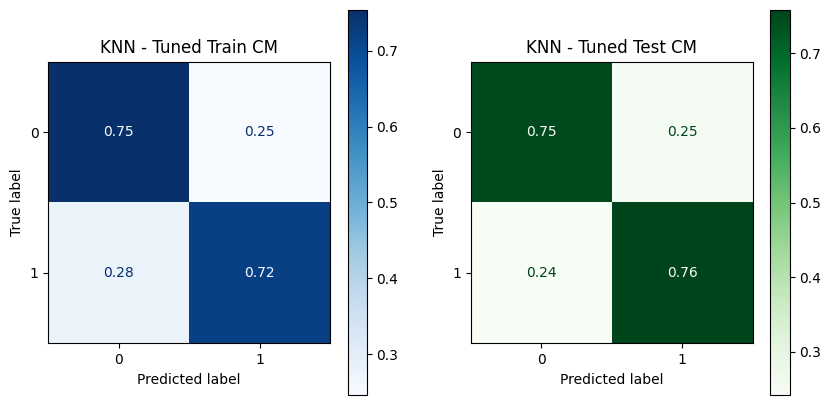

In [101]:
# Model evaluation
# display confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds_best,
                                        ax=axes[0], cmap='Blues',normalize='true')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_best,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[0].set_title('Tuned: KNN Train CM')
axes[1].set_title('Tuned: KNN Test CM');

In [102]:
# print classification report
print('Tuned: KNN Train\n', classification_report(y_train, train_preds_best))
print('Tuned: KNN Test\n', classification_report(y_test, test_preds_best))

Train
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      3644
           1       0.13      0.72      0.22       187

    accuracy                           0.75      3831
   macro avg       0.56      0.74      0.54      3831
weighted avg       0.94      0.75      0.82      3831

Test
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1216
           1       0.13      0.76      0.23        62

    accuracy                           0.75      1278
   macro avg       0.56      0.75      0.54      1278
weighted avg       0.94      0.75      0.82      1278

